<a href="https://colab.research.google.com/gist/AlexandreNap/526bc16224ab9f3ff25f7ed3e3d139c2/experiments_wave_animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install celluloid

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from celluloid import Camera
from IPython.display import HTML

In [ ]:
GRAVITY =  9.81

In [ ]:
class Point():
    def __init__(self, x, y, x_speed=0, y_speed=0):
        self.x = x
        self.y = y
        self.x_speed = x_speed
        self.y_speed = y_speed
        self.falling = False

    def get_coord(self):
        return np.array([self.x, self.y])

    def update(self):
        self.x += self.x_speed
        self.y += self.y_speed

        if self.chute:
            self.y_speed -= GRAVITY * 0.0001
        if self.y <= 0:
            self.falling = False

class Curve():
    def __init__(self, x0, y0, x1, y1, n_points):
        self.points = []
        self.n_points = n_points
        for i in range(self.n_points):
            x = x0 + (x1 - x0) * (i / (n_points - 1))
            y = y0 + (y1 - y0)*(i/(n_points - 1))
            self.points.append(Point(x,y))

    def __len__(self):
        return self.n_points

    def get_coords(self):
        return [[point.get_coord()[0] for point in self.points],
                [point.get_coord()[1] for point in self.points]]

    def slope(self, i):
        return np.arctan((self.points[i + 1].y - self.points[i].y)/(self.points[i + 1].x - self.points[i].x)) * 2 / np.pi

    def update(self):
        for i in range(self.n_points):
            if i < self.n_points-1 and -self.slope(i) > 0.8:
                self.points[i].falling = True
            self.points[i].update()


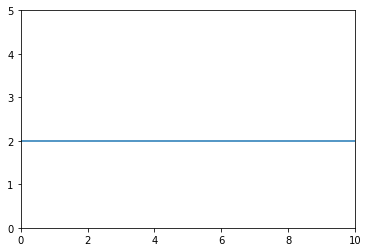

In [ ]:
crv = Curve(0,2,10,2,20)
plt.xlim(0,10)
plt.ylim(0,5)
plt.plot(*crv.get_coords())

In [ ]:
def trochoid(i, n):
  c=0
  theta = np.pi * (i / n)
  return np.cos(np.sin(theta) + theta - c)

In [1]:
plt.xlim(-5,15)
plt.ylim(0,5)
crv = Curve(0,2,10,2,40)
amplitude = 1.5
for i in range(len(crv)):
    crv.points[i].y += amplitude * 0.5 * trochoid(i, len(crv) - 1)


plt.scatter(*crv.get_coords())

NameError: ignored

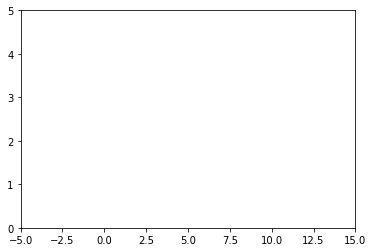

In [ ]:
fig, ax = plt.subplots()
plt.xlim(-5,15)
plt.ylim(0,5)
camera = Camera(fig)

y_step = 0.0005
x_step = 0.0008
for it in range(40):
    for i in range(len(crv)):
        if not crv.points[i].chute:
            crv.points[i].y_speed += y_step * ((len(crv) - i - 1) / len(crv)) * (1 + ((len(crv) - i - 1) / len(crv)))
        crv.points[i].x_speed += x_step * (((len(crv) - i) / len(crv)) * ((len(crv) - i) / len(crv)) * (10+ ((len(crv) - i) / len(crv))))
        crv.update()
        
    plt.scatter(*crv.get_coords(), color = 'blue')
    plt.plot([np.max([p.y for p in crv.points])]*10, color = 'blue')
    camera.snap()
anim = camera.animate(interval= 240)
HTML(anim.to_html5_video())

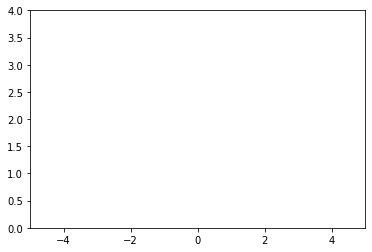

In [ ]:
points = np.array([[0,1,2,3,4,5,6,7,8,9,10],
          [0,0,0,0,0.2,0.6,1,1.2,1.3,1.3,1.3]])
fig, ax = plt.subplots()
camera = Camera(fig)
plt.xlim(-5,5)
plt.ylim(0,4)
for i in range(100):
    points[0] -= [0.1] * 11

    plt.plot(*points, color = '#e0c178')
    plt.fill_between(points[0], points[1], where=points[1]>=[0] * 11 , interpolate=True, color='#e0c178')
    camera.snap()
anim = camera.animate(interval= 30)
HTML(anim.to_html5_video())
